## Adidas vs Nike Shoes

# DEFINE

### What brand sells the most popular shoe?

In [1]:
#load everything we might need
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

__author__ = "Skyler Bullard"
__email__ = "skyler.bullard.r@gmail.com"

In [2]:
#load the data
data = pd.read_csv( 'Adidas Vs Nike.csv' )

# DISCOVER

In [3]:
#rename columns in dataframe
data.rename( columns = { "Product Name" : "Style" , "Product ID" : "ID" ,
                       "Listing Price" : "ListPrice" , "Sale Price" : "SalePrice" }
            , inplace = True )

In [4]:
#data.head()

### We have a 3,268 x 10 (row x column) dataframe. Define features:

### Style: unique description
### ID: manufacturer product number or company SKU
### ListPrice: how much money shoe sells as is
### SalePrice: how much money a retailer sells item for w/ discount
### Discount: a percentage of money removed from SalePrice
### Brand: a type of product manfuactured by a particular company under a specific name
### Description: content information for a product
### Rating: a classification of the product based on a certain assessment
### Reviews: a critical assessment of the product
### Last Visited: date-time of most recent webpage viewing

In [5]:
data.info()
print( data.size )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
Style           3268 non-null object
ID              3268 non-null object
ListPrice       3268 non-null int64
SalePrice       3268 non-null int64
Discount        3268 non-null int64
Brand           3268 non-null object
Description     3265 non-null object
Rating          3268 non-null float64
Reviews         3268 non-null int64
Last Visited    3268 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB
32680


In [6]:
#summary statistics of quantitative feature variables
data.describe()

,ListPrice,SalePrice,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


## target variable

### SalePrice is the target. Find the brand with the highest average of sales

In [7]:
#summarize target variable
data.SalePrice.describe()

count     3268.000000
mean      6134.265606
std       4293.247581
min        449.000000
25%       2999.000000
50%       4799.000000
75%       7995.000000
max      36500.000000
Name: SalePrice, dtype: float64

## Relationships

### scatterplots can simply check for a relationship between two variables

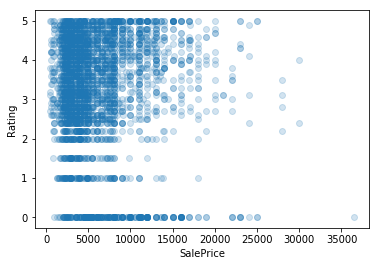

In [8]:
x = 'SalePrice'
y = 'Rating'

plt.xlabel( x )
plt.ylabel( y )
plt.scatter( data[x] , data[y] , alpha = 0.2)

### 'Rating' does not have much relationship with 'SalePrice'

In [9]:
#examine 'SalePrice' outlier data

rating_outlier = data[ data[ 'SalePrice'] > 35000 ]

print( rating_outlier )

                                Style          ID  ListPrice  SalePrice  \
3148  Nike Air VaporMax Flyknit 2 LXX  AT5673-700          0      36500   

      Discount Brand                                        Description  \
3148         0  Nike  The Nike Air VaporMax Flyknit 2 LXX places you...   

      Rating  Reviews         Last Visited  
3148     0.0        0  2020-04-13T15:36:42  


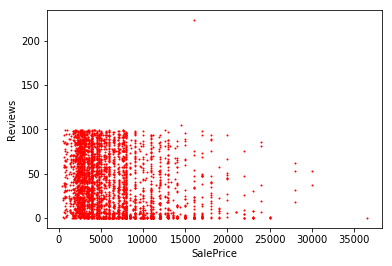

In [10]:
x = 'SalePrice'
y = 'Reviews'

plt.xlabel( x )
plt.ylabel( y )
plt.scatter( data[x] , data[y] , c = 'red' , s = 1  )

### 'Reviews' does not have much relationship with 'SalePrice'

In [11]:
#examine 'Reviews' outlier

reviews_outlier = data[ data['Reviews'] > 200 ]

print( reviews_outlier )

                    Style          ID  ListPrice  SalePrice  Discount Brand  \
2750  Air Jordan 10 Retro  310805-137          0      15995         0  Nike   

                                            Description  Rating  Reviews  \
2750  Featuring soft, lightweight cushioning, the Ai...     4.7      223   

             Last Visited  
2750  2020-04-13T15:28:25  


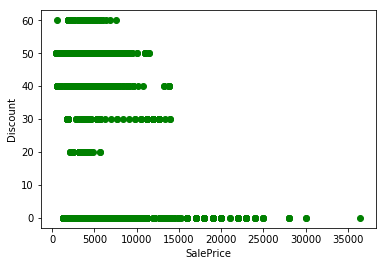

In [12]:
x = 'SalePrice'
y = 'Discount'

plt.xlabel( x )
plt.ylabel( y )
plt.scatter( data[x] , data[y] , c = 'green' )

### 'Discount' has somewhat a negative relationship with 'SalePrice'

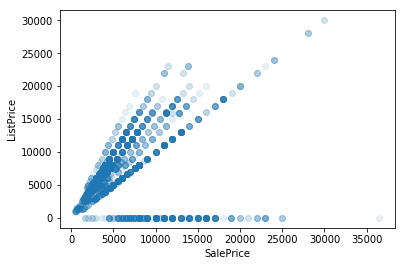

In [13]:
x = 'SalePrice'
y = 'ListPrice'

plt.xlabel( x )
plt.ylabel( y )
plt.scatter( data[x] , data[y] , alpha = 0.1 )

### 'ListPrice' has somewhat a positive relationship with 'SalePrice'

In [14]:
#compute the group size of SalePrice with each rating
sale_rating_grouped = data[ 'SalePrice' ].groupby( data[ 'Rating' ] ).size()

#call object
print( sale_rating_grouped )

Rating
0.0    302
1.0    101
1.5     70
2.0     86
2.2     78
2.4     90
2.5     83
2.6     83
2.7     83
2.8     96
2.9     74
3.0     92
3.1     86
3.2     73
3.3     72
3.4     75
3.5    101
3.6     87
3.7     89
3.8     98
3.9     92
4.0    108
4.1    104
4.2    111
4.3     94
4.4    115
4.5    114
4.6     91
4.7    108
4.8    107
4.9     98
5.0    207
Name: SalePrice, dtype: int64


In [15]:
#compute the mean 'SalePrice' for each rating and review
hier_sale_rate_rev = data[ 'SalePrice' ].groupby( [ data[ 'Rating' ] , data[ 'Reviews' ] ] ).mean()

#call object, print data in readable hierarchy
hier_sale_rate_rev.unstack()

Reviews,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,105,223
Rating,,,,,,,,,,,,,,,,,,,,,
0.0,9807.317391,NaN,1979.000000,NaN,4285.666667,NaN,NaN,23999.000000,1299.000000,NaN,...,NaN,5399.0,6279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,1840.000000,8253.571429,3520.000000,2999.000000,4199.000000,3599.000000,9299.000000,1399.000000,NaN,5399.0,...,NaN,7999.0,8999.0,4224.000000,4999.000000,NaN,NaN,7599.0,NaN,NaN
1.5,2499.000000,2999.000000,3811.000000,NaN,NaN,3999.000000,2149.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4999.000000,NaN,1799.00,NaN,NaN,NaN
2.0,4999.000000,4107.200000,5647.000000,NaN,NaN,NaN,4799.000000,NaN,NaN,3999.0,...,NaN,NaN,3799.0,5179.000000,NaN,2799.000000,2124.00,NaN,NaN,NaN
2.2,NaN,6979.000000,3600.000000,2759.000000,NaN,11597.666667,3529.000000,NaN,NaN,NaN,...,3999.000000,NaN,NaN,NaN,10299.000000,5999.000000,4999.00,5549.0,NaN,NaN
2.4,NaN,1799.000000,4924.000000,NaN,NaN,6397.000000,5999.000000,NaN,NaN,NaN,...,2299.000000,NaN,NaN,1679.000000,1844.000000,NaN,3359.00,2649.0,NaN,NaN
2.5,5599.000000,3599.000000,4099.000000,NaN,3599.000000,3299.000000,3748.333333,2224.000000,5132.333333,NaN,...,10999.000000,NaN,NaN,2799.000000,NaN,NaN,4999.00,NaN,NaN,NaN
2.6,NaN,NaN,3959.000000,1749.000000,5999.000000,3679.000000,6249.000000,NaN,NaN,4499.0,...,NaN,NaN,17999.0,NaN,NaN,4674.250000,4799.00,NaN,NaN,NaN
2.7,4749.000000,NaN,NaN,9496.333333,2799.000000,NaN,NaN,NaN,NaN,7199.0,...,4000.000000,1899.0,NaN,NaN,NaN,2499.000000,3499.00,NaN,NaN,NaN


## the 75th percentile indicates 25% of shoes sold have greater than or equal to a total of 104 ratings

In [16]:
sale_rating_grouped.describe()

count     32.00000
mean     102.12500
std       43.61174
min       70.00000
25%       83.00000
50%       92.00000
75%      104.75000
max      302.00000
Name: SalePrice, dtype: float64

## 1,877 shoes have sold with both ratings and reviews

In [17]:
hier_sale_rate_rev.describe()

count     1877.000000
mean      5503.923095
std       3421.768789
min        499.000000
25%       2999.000000
50%       4559.000000
75%       6999.000000
max      23999.000000
Name: SalePrice, dtype: float64

### binning is dividing a range of values into non-overlapping intervals and counting the number of values in each bin

#### binning the data can help visual meanings in features become clearer

In [18]:
quant_data = data.select_dtypes( include = 'number' )

#quant_data.head()

In [19]:
#define a sorted array of unique ratings
uni_rate = np.sort( data [ 'Rating' ].unique() )

In [20]:
#define array of divided bins
bin_rate = [ 1 , 3 , 5 ]

In [21]:
#divide bins of 1 to 3, and 3 to 5
binned_rates = pd.cut( uni_rate , bin_rate , right = False )

In [22]:
#print counts for the result
pd.value_counts( binned_rates )

[3, 5)    20
[1, 3)    10
dtype: int64

### first plot shows most ratings fall between 2 and 5
### second plot infers what values are and the total counts

(array([302.,   0.,   0.,   0.,   0.,   0., 101.,   0.,   0.,  70.,   0.,
          0.,  86.,  78.,  90., 166., 179.,  74., 178., 145.,  75., 188.,
        187.,  92., 212., 205., 115., 205., 215., 305.]),
 array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        , 1.16666667, 1.33333333, 1.5       ,
        1.66666667, 1.83333333, 2.        , 2.16666667, 2.33333333,
        2.5       , 2.66666667, 2.83333333, 3.        , 3.16666667,
        3.33333333, 3.5       , 3.66666667, 3.83333333, 4.        ,
        4.16666667, 4.33333333, 4.5       , 4.66666667, 4.83333333,
        5.        ]),
 <a list of 30 Patch objects>)

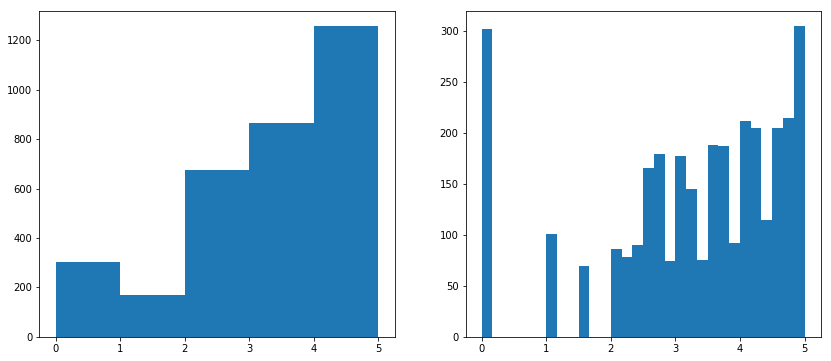

In [23]:
#plot 'Rating' feature with varying bins
plt.figure( figsize = ( 14 , 6 ) )
plt.subplot( 1 , 2 , 1 )

#save feature into new variable
bin_ratings =  data[ 'Rating' ]

#left plot
plt.hist( bin_ratings , bins = 5 )

plt.subplot( 1 , 2 , 2 )

#right plot
plt.hist( bin_ratings , bins = 30 )

## histograms show the frequency of each value. here, the frequency shows as the # of times bin values appear

### find the average SalePrice for each rating

## histograms highlight frequency of each data point in a distribution. boxplots focus on the range of values in that distribution.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

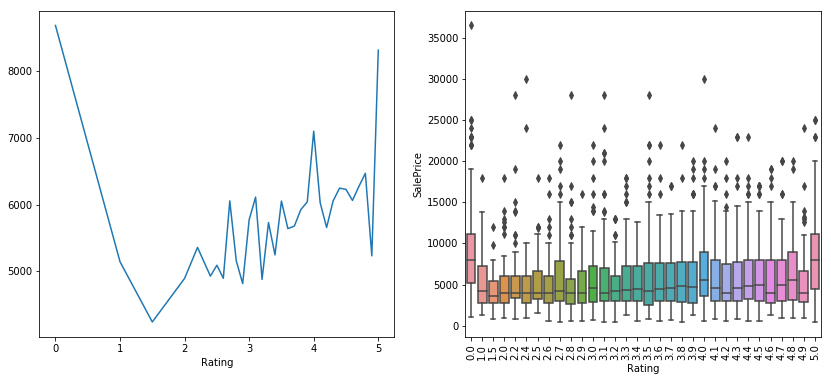

In [24]:
plt.figure( figsize = ( 14 , 6 ) )
plt.subplot( 1 , 2 , 1 )

mean = data.groupby( data[ 'Rating' ] )[ 'SalePrice' ].mean()
mean.plot()

plt.subplot( 1 , 2 , 2 )

rating_plot = sns.boxplot( x = 'Rating' , y = 'SalePrice' , data = data )

plt.xticks( rotation = 90 )

## shoes with zero ratings have the highest average sale price

## however, shoes with higher ratings are sold more

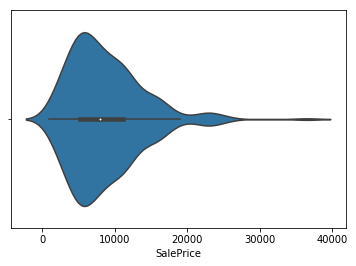

In [25]:
indiv_rating_min = data[ data[ 'Rating' ] == 0.0 ]

sns.violinplot( x = 'SalePrice' , data = indiv_rating_min )

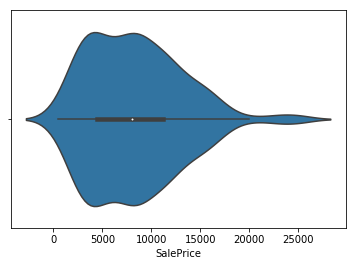

In [26]:
indiv_rating_max = data[ data[ 'Rating' ] == 5.0 ]

sns.violinplot( x = 'SalePrice' , data = indiv_rating_max )

## violin plots show probability density of the data at each value. included is median marker, interquartile ranges; like a standard boxplot. overlaid is a kernal density estimation or in laymen's terms: a variable distribution across different data points

In [35]:
rating_max = data[ 'Rating' ] == 5.0

rating_min = data[ 'Rating' ] == 0

In [41]:
#print total number of ratings equal to zero, five

print( "Number of shoe sales with Rating of 5: " , rating_max.sum() )
print( "Number of shoe sales with Rating of 0: " , rating_min.sum() )

Number of shoe sales with Rating of 5:  207
Number of shoe sales with Rating of 0:  302


In [51]:
#print average sale price of shoes with rating of zero, five

print( data[ 'SalePrice' ].groupby( rating_max ).mean() )
print( data[ 'SalePrice' ].groupby( rating_min ).mean() )


Rating
False    5986.577262
True     8318.198068
Name: SalePrice, dtype: float64
Rating
False    5874.210722
True     8688.314570
Name: SalePrice, dtype: float64


### the average sale price of a shoe with rating zero: 8,688 dollars
### the average sale price of a shoe with rating five: 8,318 dollars